In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
orig_data = pd.read_csv("data/train_2008.csv")
data = orig_data.copy()

In [63]:
data_orig_cols = list(orig_data.columns) # original columns, with target PES1 on the end

# Feature Engineering

In [4]:
# Dummify categorical vars
to_dummy = ['GEREG', 'PTDTRACE', 'PENATVTY', 'PEIO1COW', 'PEAFWHN1', 'GTCBSASZ',]

dummy_df = pd.DataFrame()

for var in to_dummy:
    dummy_vars = pd.get_dummies(data[var], prefix=var)
    dummy_df = pd.concat([dummy_df, dummy_vars], axis=1)
    
# Drop the original categorical variables
data.drop(to_dummy, axis=1, inplace=True)

# Add dummy vars to the data
data = pd.concat([data, dummy_df], axis=1)

# Drop allocation flag features; handle missing values

In [7]:
# Drop "weight" features
weight_feats = [col for col in data.columns if col[-3:] == 'WGT']
data.drop(weight_feats, axis=1, inplace=True)

# Drop some other columns that are "bad"
bad_feats = ['QSTNUM', 'PRERNWA', 'PRERNHLY', 'PEERNH1O', 'HRHHID2', 'GTCSA', 'GTCO', 'HUINTTYP', 'HURESPLI', 'HRMIS',
            'PRDTOCC1', 'PRFAMREL', 'PUSLFPRX', 'OCCURNUM', 'PULINENO', 'PRMJOCC1', 'PRCHLD', 'GTCBSA', 'HRLONGLK',]
data.drop(bad_feats, axis=1, inplace=True)

In [8]:
# Drop allocation flag features
allocation_flag_feats = [col for col in data.columns if col[:2] == 'PX']
data.drop(allocation_flag_feats, axis=1, inplace=True)

# Replace negative values (all forms of N/A) with NaN
for feat in data.columns:
    data[feat] = data[feat].apply(lambda x: np.NaN if x < 0 else x)
    
# Replace NaN with the mean of the column
for feat in data.columns:
    data[feat].fillna(data[feat].mean(), inplace=True)
    
# Check for columns that are all NaN, and delete them
all_nan_cols = []
for feat in data.columns:
    if np.all(np.isnan(data[feat])):
        all_nan_cols.append(feat)
data.drop(all_nan_cols, axis=1, inplace=True)

In [9]:
pes1 = data['PES1']
data.drop('PES1', axis=1, inplace=True)
data['PES1'] = pes1

In [10]:
data.columns

Index(['id', 'HRMONTH', 'HRYEAR4', 'HUFINAL', 'HUSPNISH', 'HETENURE',
       'HEHOUSUT', 'HETELHHD', 'HETELAVL', 'HEPHONEO',
       ...
       'PEAFWHN1_8', 'PEAFWHN1_9', 'GTCBSASZ_0', 'GTCBSASZ_2', 'GTCBSASZ_3',
       'GTCBSASZ_4', 'GTCBSASZ_5', 'GTCBSASZ_6', 'GTCBSASZ_7', 'PES1'],
      dtype='object', length=440)

# Write out datasets

In [9]:
# Move PES1 (target feature) to the end of the dataframe
pes1 = data['PES1']
data.drop('PES1', axis=1, inplace=True)
data['PES1'] = pes1

In [170]:
# Check that columns look right before writing out
data.columns

Index(['id', 'HRMONTH', 'HRYEAR4', 'HURESPLI', 'HUFINAL', 'HUSPNISH',
       'HETENURE', 'HEHOUSUT', 'HETELHHD', 'HETELAVL',
       ...
       'korea_vet', 'male', 'female', 'hispanic', 'nonhispanic', 'retired',
       'not_retired', 'grad_courses_since_bach', 'no_grad_courses_since_bach',
       'PES1'],
      dtype='object', length=326)

In [189]:
# Write out new data sets
data_eng_feats_only.to_csv('train_2008_eng_feats_only.csv', index=False)
data.to_csv('train_2008_with_eng_feats_no_allo_flags.csv', index=False)
data_orig_clean.to_csv('train_2008_clean_no_eng_feats.csv', index=False)

# Remove misleading features (mostly codes)

starting with data that has engineered features, negative values set to the mean of the feature, and allocation flags removed.

In [12]:
# first list is from eyeballing; second is list of "weight" features that are just used for statistical tallying
bad_cols = ['GESTFIPS', 'GESTCEN',] + [col for col in data.columns if col[-3:] == 'WGT']

# drop 'em
data.drop(bad_cols, axis=1, inplace=True)

In [69]:
# ### GTCBSASZ indicates size of city of residence - seems useful. Let's dummy it!

# # First we need to convert the codes into categorical variables
# city_size_map = {
#                     0:  'rural',
#                     2:  '100_250',
#                     3:  '250_500',
#                     4:  '500_1000',
#                     5:  '1000_2500',
#                     6:  '2500_5000',
#                     7:  '5000_plus'
#                 }
# data['GTCBSASZ'] = data['GTCBSASZ'].map(city_size_map)

# # encode in dummy vars
# city_size_dummies = pd.get_dummies(data['GTCBSASZ'], prefix='city_size')

# # add these new features to the data
# data = pd.concat([data, city_size_dummies], axis=1)

In [76]:
# # Drop the original city size feature
# data.drop('GTCBSASZ', axis=1, inplace=True)

# # Rearrange columns so the target PES1 is last
# pes1 = data['PES1']
# data.drop('PES1', axis=1, inplace=True)
# data['PES1'] = pes1

In [13]:
data.columns

Index(['id', 'HRMONTH', 'HRYEAR4', 'HUFINAL', 'HUSPNISH', 'HETENURE',
       'HEHOUSUT', 'HETELHHD', 'HETELAVL', 'HEPHONEO',
       ...
       'PEAFWHN1_8', 'PEAFWHN1_9', 'GTCBSASZ_0', 'GTCBSASZ_2', 'GTCBSASZ_3',
       'GTCBSASZ_4', 'GTCBSASZ_5', 'GTCBSASZ_6', 'GTCBSASZ_7', 'PES1'],
      dtype='object', length=438)

# More exploration

In [14]:
train = data.ix[1:, 3:-1]
targets = data.ix[1:, -1]

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)

In [16]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_

In [17]:
features.sort(['importance'],ascending=False).head(30)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,feature,importance
30,PEEDUCA,0.038594
23,PEAGE,0.033494
7,HUFAMINC,0.032985
2,HETENURE,0.018611
10,HRNUMHOU,0.018552
18,GTCBSAST,0.016524
221,PEIO1OCD,0.016172
12,HUPRSCNT,0.016027
214,PEDIPGED,0.015748
21,PERRP,0.015000


In [18]:
train.shape

(64666, 434)

In [19]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

(64666, 126)

In [21]:
train_new = pd.DataFrame(train_new)
train_new['Y'] = np.array(targets)
train_new.to_csv('data/training_data_cleaned3.csv', index=False)

In [22]:
train_new.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       117, 118, 119, 120, 121, 122, 123, 124, 125, 'Y'],
      dtype='object', length=127)

In [138]:
len(features)

316

In [141]:
train_new

array([[   1.,  201.,    2., ...,    0.,    0.,    0.],
       [   1.,    1.,    1., ...,    0.,    0.,    0.],
       [   2.,    1.,    1., ...,    0.,    0.,    1.],
       ..., 
       [   1.,    1.,    1., ...,    0.,    0.,    0.],
       [   1.,  201.,    3., ...,    0.,    1.,    0.],
       [   1.,  201.,    1., ...,    0.,    0.,    1.]])

In [23]:
imp_mean = features.importance.mean()

In [149]:
features[features['feature'] == 'south']['importance']

272    0.008672
Name: importance, dtype: float64

In [24]:
keep_feats = []
for f in features['feature']:
    if float(features[features['feature'] == f]['importance']) >= imp_mean:
        keep_feats.append(f)

In [27]:
len(keep_feats)

126

In [29]:
import pickle as pkl
pkl.dump(keep_feats, open('keep_feats.pkl', 'wb'))

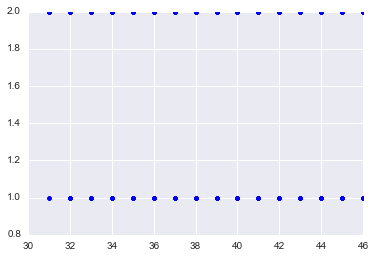

In [161]:
plt.plot(data['PEEDUCA'], data['PES1'], 'b.')

([array([    29.,      0.,     92.,      0.,    218.,      0.,    593.,
              0.,    408.,      0.,    619.,      0.,    857.,      0.,
            355.,      0.,  13232.,      0.,  10077.,      0.,   2277.,
              0.,   2711.,      0.,  10833.,      0.,   4237.,      0.,
            933.,    681.]),
  array([   110.,      0.,    214.,      0.,    457.,      0.,   1220.,
              0.,    890.,      0.,   1364.,      0.,   1817.,      0.,
            695.,      0.,  20202.,      0.,  13089.,      0.,   2867.,
              0.,   3270.,      0.,  12169.,      0.,   4559.,      0.,
           1013.,    731.])],
 array([ 31. ,  31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,
         35.5,  36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,
         40. ,  40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,
         44.5,  45. ,  45.5,  46. ]),
 <a list of 2 Lists of Patches objects>)

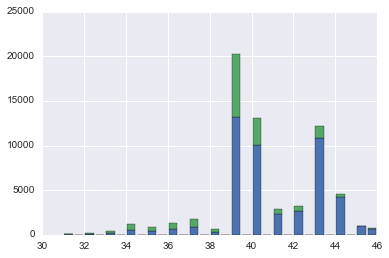

In [166]:
plt.hist([data[data['PES1'] == 1]['PEEDUCA'], data[data['PES1'] == 2]['PEEDUCA']], stacked=True, bins=30)

In [168]:
data['PEEDUCA'].median()

40.0